# PCA

In [61]:
#X_train = data_radiances_36bands[:,-637:,:589]
X_train = subset_data_radiances_38bands

In [62]:
np.shape(X_train)

(38, 600, 600)

In [63]:
n_bands=len(X_train[:,0,0])

In [64]:
# Convert 2d band array in 1-d to make them as feature vectors and Standardization
#https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f
MB_matrix = np.zeros((X_train[0,:,:].size,n_bands))
for i in range(n_bands):
    MB_array = X_train[i,:,:].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
print(np.shape(MB_matrix))

(360000, 38)


In [75]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

print("Eigenvalues:\n\n", EigVal,"\n")
print("Percentage of Variance Explained by Each Component: \n", EigVal/sum(EigVal))

Eigenvalues:

 [2.178e+01 8.112e+00 2.373e+00 1.271e+00 1.117e+00 7.348e-01 6.259e-01
 3.906e-01 3.205e-01 2.796e-01 1.884e-01 1.854e-01 1.176e-01 1.003e-01
 6.285e-02 6.619e-02 5.224e-02 4.444e-02 4.192e-02 3.268e-02 3.074e-02
 2.094e-02 1.827e-02 1.067e-02 5.972e-03 4.940e-03 4.652e-03 3.940e-03
 2.165e-03 1.182e-03 8.686e-04 5.978e-04 4.495e-04 6.429e-05 1.550e-04
 1.685e-04 2.830e-04 2.574e-04] 

Percentage of Variance Explained by Each Component: 
 [5.731e-01 2.135e-01 6.245e-02 3.345e-02 2.939e-02 1.934e-02 1.647e-02
 1.028e-02 8.433e-03 7.357e-03 4.957e-03 4.880e-03 3.094e-03 2.641e-03
 1.654e-03 1.742e-03 1.375e-03 1.169e-03 1.103e-03 8.600e-04 8.089e-04
 5.509e-04 4.807e-04 2.808e-04 1.572e-04 1.300e-04 1.224e-04 1.037e-04
 5.697e-05 3.111e-05 2.286e-05 1.573e-05 1.183e-05 1.692e-06 4.079e-06
 4.434e-06 7.448e-06 6.774e-06]


In [76]:
tot = sum(EigVal)  #https://medium.com/luca-chuangs-bapm-notes/principal-component-analysis-pca-using-python-scikit-learn-48c4c13e49af
var_exp = [(i / tot) for i in sorted(EigVal, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.573, 0.787, 0.849, 0.882, 0.912, 0.931, 0.948, 0.958, 0.966,
       0.974, 0.979, 0.984, 0.987, 0.989, 0.991, 0.993, 0.994, 0.995,
       0.996, 0.997, 0.998, 0.999, 0.999, 0.999, 0.999, 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ])

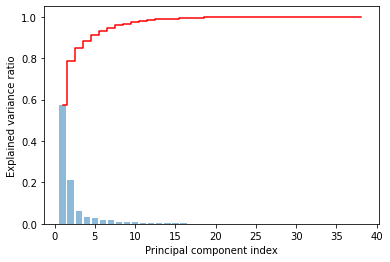

In [79]:
# make a bar plot of the variance associated with each component
import matplotlib.pyplot as plt

plt.bar(range(1,39), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,39), cum_var_exp, where='mid',
         label='Cumulative explained variance',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

In [66]:
# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix,EigVec)   #cross product

In [80]:
# PCA sklearn
from sklearn.decomposition import PCA

pca = PCA()

# fit_transform() is used to calculate the PCAs from training data
X_train_pca = pca.fit_transform(MB_matrix)

# to get the fit statistics (variance explained per component)
print("sklearn var:\n", pca.explained_variance_ratio_)
print("numpy var: \n", EigVal/sum(EigVal))

sklearn var:
 [5.731e-01 2.135e-01 6.245e-02 3.345e-02 2.939e-02 1.934e-02 1.647e-02
 1.028e-02 8.433e-03 7.357e-03 4.957e-03 4.880e-03 3.094e-03 2.641e-03
 1.742e-03 1.654e-03 1.375e-03 1.169e-03 1.103e-03 8.600e-04 8.089e-04
 5.509e-04 4.807e-04 2.808e-04 1.572e-04 1.300e-04 1.224e-04 1.037e-04
 5.697e-05 3.111e-05 2.286e-05 1.573e-05 1.183e-05 7.448e-06 6.774e-06
 4.434e-06 4.079e-06 1.692e-06]
numpy var: 
 [5.731e-01 2.135e-01 6.245e-02 3.345e-02 2.939e-02 1.934e-02 1.647e-02
 1.028e-02 8.433e-03 7.357e-03 4.957e-03 4.880e-03 3.094e-03 2.641e-03
 1.654e-03 1.742e-03 1.375e-03 1.169e-03 1.103e-03 8.600e-04 8.089e-04
 5.509e-04 4.807e-04 2.808e-04 1.572e-04 1.300e-04 1.224e-04 1.037e-04
 5.697e-05 3.111e-05 2.286e-05 1.573e-05 1.183e-05 1.692e-06 4.079e-06
 4.434e-06 7.448e-06 6.774e-06]


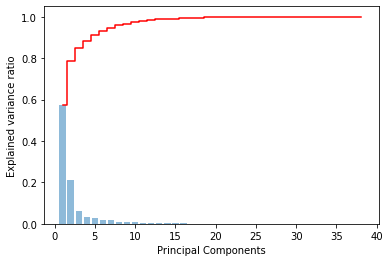

In [81]:
# like we did above visualize the PCs 
# and the cumulative variance explained by each PC

plt.bar(range(1,39), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,39), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [74]:
import pandas as pd  #https://plotly.com/python/pca-visualization/
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

#boston = load_boston()
df = MB_matrix[:4,:500] #pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    #color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

### other methods 

In [92]:
from sklearn.manifold import TSNE
from sklearn import manifold

##############
######
#ISOMAP
######
##############

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(MB_matrix)
manifold_iso_data = iso.transform(MB_matrix)

MemoryError: Unable to allocate 966. GiB for an array with shape (360000, 360000) and data type float64

In [377]:
from sklearn.datasets import make_swiss_roll
n_samples = 2500
X, color = make_swiss_roll(n_samples)

NameError: name 'manifold_iso_data' is not defined

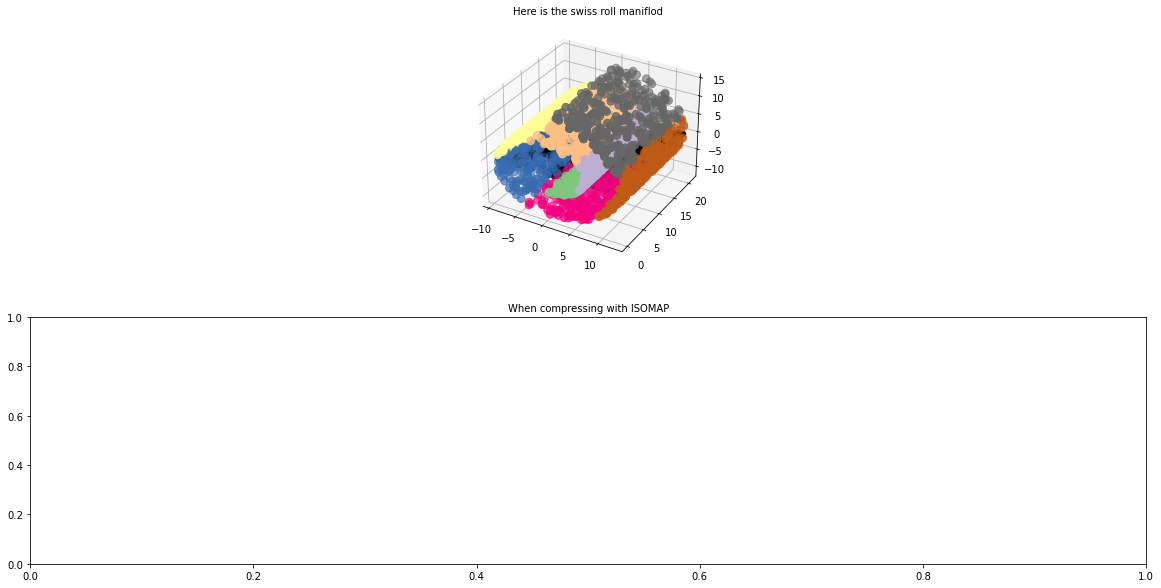

In [378]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:2500] 
y = X[:,1][2:2500] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_iso_data[:,0],manifold_iso_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:2500]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:2500]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

In [ ]:
#print(f'scale: {ch30_scale}, offset: {ch30_offset}')

In [ ]:
# Subset data. check  https://hdfeos.org/zoo/index_openLAADS_Examples.php
#data = data_raw[0,:,:].astype(np.double)
#np.shape(data)

In [ ]:
#debo trabajar con radiances o q?

In [ ]:
https://oceancolor.gsfc.nasa.gov/forum/oceancolor/topic_show.pl?tid=1049  #info about lat,lon
    https://stackoverflow.com/questions/29135885/netcdf4-extract-for-subset-of-lat-lon

In [ ]:
#PCA
https://www.sciencedirect.com/science/article/abs/pii/S0957417420301020
    https://link.springer.com/article/10.1007/s12524-018-0803-1  #'GET THE PAPER'++
        
        https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22 #reader

In [ ]:
# more pca https://www.kaggle.com/akhileshrai/intro-cnn-pytorch-pca-tnse-isomap

In [ ]:
https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f

In [ ]:
    https://notebook.community/dennissergeev/classcode/notebooks/01_MODIS_L1B
    http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [ ]:
https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/modis-data-in-python/
    https://towardsdatascience.com/pca-with-numpy-58917c1d0391
    https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
        https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
            https://ccplot.org/pub/resources/Aqua/MODIS%20Level%201B%20Product%20User%20Guide.pdf
                https://modis.gsfc.nasa.gov/about/specifications.php

In [ ]:
Histograma https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/

https://www.youtube.com/watch?v=g-Hb26agBFg


In [ ]:
https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_rgb.py
    https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_combine.py
        https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_wget.py

In [ ]:
!ncks -d Longitude,4.5.,14.496. -d Latitude,47.5.,47.5.  MYD021KM.A2013122.1140.061.2018046032403.hdf  subset_MYD021KM.A2013122.1140.061.2018046032403.hdf


In [ ]:
!ncdump -h MYD021KM.A2013122.1140.061.2018046032403.hdf


In [ ]:
np.shape(latitude)
plt.scatter(latitude[0], latitude[1], alpha=0.5)
plt.title('Scatter plot latitude')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
https://av.tib.eu/media/15573  conda install -c hcc pymodis #http://www.pymodis.org/

info https://modaps.modaps.eosdis.nasa.gov/services/about/product_descriptions_aqua.html
https://bpostance.github.io/posts/working-with-MODIS-data/
mdois geo https://www.icare.univ-lille.fr/modis-geolocation/

In [ ]:
#check then, 
# Generate Paiplot for original data and transformed PCs
import seaborn as sns
import pandas as pd

Bandnames = ['Band 20','Band 21','Band 22','Band 23','Band 24','Band 25','Band 27','Band 28','Band 29','Band 30','Band 31','Band 32','Band 33','Band 34','Band 35','Band 36']
a = sns.pairplot(pd.DataFrame(MB_matrix,
                columns = Bandnames),
                 diag_kind='kde',plot_kws={"s": 3})
a.fig.suptitle("Pair plot of Band images")

PCnames = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7','PC 8','PC 9','PC 10','PC 11','PC 12','PC 13','PC 14','PC 15','PC 16']
b = sns.pairplot(pd.DataFrame(PC,
                columns = PCnames),
                 diag_kind='kde',plot_kws={"s": 3})
b.fig.suptitle("Pair plot of PCs")

#check the names to do automatically